In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 
import requests
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
import time


L = []

Année = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
Mois = ['janvier','fevrier','mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre']
for a in Année:
  for m in Mois:
    u = "https://www.infoclimat.fr/climatologie-mensuelle/07249/{}/{}/orleans-bricy.html".format(m, a)
    try:
      r=requests.get(u)
      print(r.status_code,u)
      html = r.content
      df_list = pd.read_html(html)
      print(len(df_list))
      df = df_list[1]
      df['mois'] = m
      df['année'] = a
      L.append(df_list[1]) 
      time.sleep(0.1)
    except: 
      print(u)

200 https://www.infoclimat.fr/climatologie-mensuelle/07249/janvier/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/fevrier/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/mars/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/avril/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/mai/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/juin/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/juillet/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/aout/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/septembre/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/octobre/2012/orleans-bricy.html
6
200 https://www.infoclimat.fr/climatologie-mensuelle/07249/novembre/2012/orleans-br

In [3]:
M =  pd.concat(L)
M

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,Temps observé help,mois,année,Neige max help
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,+ 17h,janvier,2012,NaN
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,+ 0h,janvier,2012,NaN
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,+ +,janvier,2012,NaN
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,NaN,janvier,2012,NaN
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,+,janvier,2012,NaN
...,...,...,...,...,...,...,...,...,...,...
34,Extrêmes Décade 3,-0.3 °C 4 °C,-999 °C 7.6 °C,NaN,NaN,57.6 km/h,NaN,novembre,2021,NaN
35,Moyennes/cumuls Décade 3,2.3 °C,-246.1 °C,1.6 mm,1h 34mn,NaN,NaN,novembre,2021,NaN
36,Moyenneset cumuls,2.9 °C –1.1,10.1 °C –0.3,24.3 mm –58%,74h 26mn+5%,NaN,NaN,novembre,2021,NaN
37,"Maxi du mois(TNX, TXX)",8.8 °C,14.3 °C 21.8°C le 06/11/1955,12.1 mm/jour,433 W/m²,57.6 km/h,NaN,novembre,2021,0 cm


In [4]:
M.to_csv('données_météo4.csv',index = False)

In [5]:
import pandas as pd

data = pd.read_csv('données_météo4.csv')
data

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,Temps observé help,mois,année,Neige max help
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,+ 17h,janvier,2012,NaN
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,+ 0h,janvier,2012,NaN
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,+ +,janvier,2012,NaN
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,NaN,janvier,2012,NaN
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,+,janvier,2012,NaN
...,...,...,...,...,...,...,...,...,...,...
4688,Extrêmes Décade 3,-0.3 °C 4 °C,-999 °C 7.6 °C,NaN,NaN,57.6 km/h,NaN,novembre,2021,NaN
4689,Moyennes/cumuls Décade 3,2.3 °C,-246.1 °C,1.6 mm,1h 34mn,NaN,NaN,novembre,2021,NaN
4690,Moyenneset cumuls,2.9 °C –1.1,10.1 °C –0.3,24.3 mm –58%,74h 26mn+5%,NaN,NaN,novembre,2021,NaN
4691,"Maxi du mois(TNX, TXX)",8.8 °C,14.3 °C 21.8°C le 06/11/1955,12.1 mm/jour,433 W/m²,57.6 km/h,NaN,novembre,2021,0 cm


In [6]:
columns_to_drop=['Temps observé  help', 'Neige max  help']
data=data.drop(columns_to_drop,axis=1)
data

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,mois,année
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,janvier,2012
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,janvier,2012
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,janvier,2012
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,janvier,2012
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,janvier,2012
...,...,...,...,...,...,...,...,...
4688,Extrêmes Décade 3,-0.3 °C 4 °C,-999 °C 7.6 °C,NaN,NaN,57.6 km/h,novembre,2021
4689,Moyennes/cumuls Décade 3,2.3 °C,-246.1 °C,1.6 mm,1h 34mn,NaN,novembre,2021
4690,Moyenneset cumuls,2.9 °C –1.1,10.1 °C –0.3,24.3 mm –58%,74h 26mn+5%,NaN,novembre,2021
4691,"Maxi du mois(TNX, TXX)",8.8 °C,14.3 °C 21.8°C le 06/11/1955,12.1 mm/jour,433 W/m²,57.6 km/h,novembre,2021


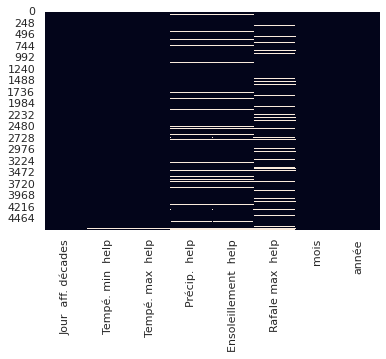

In [7]:
import seaborn as sns
sns.heatmap(data.isna(), cbar=False)

In [8]:
import re
string = "00mn 114 W/m²	"
string2 = "3h 07mn 239 W/m²	"

def get_time(row):
  if isinstance(row, str):
    first = re.sub(r"\d+ W/m² ?", "", row).strip()
    return re.sub(r"[\–+]\d+%", "", first).strip()
  else:
    return ""

data["soleil_duree"] = data["Ensoleillement  help"].apply(get_time)
list(data.soleil_duree.values)

['00mn',
 '3h 07mn',
 '06mn',
 '5h 19mn',
 '18mn',
 '7h 00mn',
 '20mn',
 '00mn',
 '00mn',
 '00mn',
 '',
 '16h 10mn',
 '30mn',
 '01mn',
 '1h 07mn',
 '3h 57mn',
 '7h 54mn',
 '7h 55mn',
 '6h 36mn',
 '00mn',
 '00mn',
 '02mn',
 '',
 '28h 02mn',
 '00mn',
 '00mn',
 '2h 06mn',
 '1h 36mn',
 '00mn',
 '1h 12mn',
 '6h 00mn',
 '06mn',
 '2h 54mn',
 '00mn',
 '36mn',
 '',
 '14h 30mn',
 '58h 42mn',
 '',
 '',
 '4h 48mn',
 '8h 42mn',
 '8h 48mn',
 '8h 38mn',
 '00mn',
 '4h 30mn',
 '9h 00mn',
 '2h 43mn',
 '8h 02mn',
 '9h 08mn',
 '',
 '64h 19mn',
 '9h 12mn',
 '6h 48mn',
 '00mn',
 '1h 00mn',
 '56mn',
 '00mn',
 '2h 24mn',
 '00mn',
 '7h 26mn',
 '9h 42mn',
 '',
 '37h 28mn',
 '9h 48mn',
 '8h 18mn',
 '00mn',
 '1h 49mn',
 '00mn',
 '4h 12mn',
 '7h 26mn',
 '1h 48mn',
 '9h 24mn',
 '',
 '42h 45mn',
 '144h 32mn',
 '',
 '',
 '00mn',
 '00mn',
 '12mn',
 '01mn',
 '6h 36mn',
 '1h 48mn',
 '19mn',
 '9h 24mn',
 '9h 48mn',
 '24mn',
 '',
 '28h 32mn',
 '56mn',
 '10h 54mn',
 '6h 48mn',
 '10h 48mn',
 '10h 49mn',
 '11h 02mn',
 '00mn'

In [9]:
string = "10h 08mn"# => 10*60 + 8
string2 = ""

def get_minutes(row: str) -> int:
  row = row.split()
  if len(row) == 2:
    

    heure_en_minutes = int(row[0].replace("h",""))*60
    minutes = int(row[1].replace("mn",""))
    return heure_en_minutes + minutes
  
  elif len(row) == 0:
    return None

  else:
    minutes = int(row[0].replace("mn",""))
    return minutes
get_minutes(string2)

In [10]:
data["soleil_durée"] = data["soleil_duree"].apply(get_minutes)
data

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,mois,année,soleil_duree,soleil_durée
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,janvier,2012,00mn,0.0
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,janvier,2012,3h 07mn,187.0
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,janvier,2012,06mn,6.0
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,janvier,2012,5h 19mn,319.0
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,janvier,2012,18mn,18.0
...,...,...,...,...,...,...,...,...,...,...
4688,Extrêmes Décade 3,-0.3 °C 4 °C,-999 °C 7.6 °C,NaN,NaN,57.6 km/h,novembre,2021,,NaN
4689,Moyennes/cumuls Décade 3,2.3 °C,-246.1 °C,1.6 mm,1h 34mn,NaN,novembre,2021,1h 34mn,94.0
4690,Moyenneset cumuls,2.9 °C –1.1,10.1 °C –0.3,24.3 mm –58%,74h 26mn+5%,NaN,novembre,2021,74h 26mn,4466.0
4691,"Maxi du mois(TNX, TXX)",8.8 °C,14.3 °C 21.8°C le 06/11/1955,12.1 mm/jour,433 W/m²,57.6 km/h,novembre,2021,,NaN


In [11]:
jd = data['Jour  aff. décades']
data[['nom du jour','jour']] =  jd.str.split(" ", n=1, expand=True)
data

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,mois,année,soleil_duree,soleil_durée,nom du jour,jour
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,janvier,2012,00mn,0.0,date_range,Dimanche 1
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,janvier,2012,3h 07mn,187.0,date_range,Lundi 2
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,janvier,2012,06mn,6.0,date_range,Mardi 3
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,janvier,2012,5h 19mn,319.0,date_range,Mercredi 4
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,janvier,2012,18mn,18.0,date_range,Jeudi 5
...,...,...,...,...,...,...,...,...,...,...,...,...
4688,Extrêmes Décade 3,-0.3 °C 4 °C,-999 °C 7.6 °C,NaN,NaN,57.6 km/h,novembre,2021,,NaN,Extrêmes,Décade 3
4689,Moyennes/cumuls Décade 3,2.3 °C,-246.1 °C,1.6 mm,1h 34mn,NaN,novembre,2021,1h 34mn,94.0,Moyennes/cumuls,Décade 3
4690,Moyenneset cumuls,2.9 °C –1.1,10.1 °C –0.3,24.3 mm –58%,74h 26mn+5%,NaN,novembre,2021,74h 26mn,4466.0,Moyenneset,cumuls
4691,"Maxi du mois(TNX, TXX)",8.8 °C,14.3 °C 21.8°C le 06/11/1955,12.1 mm/jour,433 W/m²,57.6 km/h,novembre,2021,,NaN,Maxi,"du mois(TNX, TXX)"


In [12]:
liste_supr = ["Extrêmes Décade 1","Moyennes/cumuls Décade 1","Extrêmes Décade 2",
              "Moyennes/cumuls Décade 2","Extrêmes Décade 3","Moyennes/cumuls Décade 3","Moyenneset cumuls","Maxi du mois(TNX, TXX)","Mini du mois(TNN, TXN)"]

In [13]:
data = data[~data["Jour  aff. décades"].isin(liste_supr)]
data

,Jour aff. décades,Tempé. min help,Tempé. max help,Précip. help,Ensoleillement help,Rafale max help,mois,année,soleil_duree,soleil_durée,nom du jour,jour
0,date_range Dimanche 1,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,00mn 114 W/m²,64.8 km/h,janvier,2012,00mn,0.0,date_range,Dimanche 1
1,date_range Lundi 2,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,3h 07mn 239 W/m²,55.6 km/h,janvier,2012,3h 07mn,187.0,date_range,Lundi 2
2,date_range Mardi 3,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,06mn 17 W/m²,72.2 km/h,janvier,2012,06mn,6.0,date_range,Mardi 3
3,date_range Mercredi 4,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,5h 19mn 300 W/m²,56.5 km/h,janvier,2012,5h 19mn,319.0,date_range,Mercredi 4
4,date_range Jeudi 5,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,18mn 78 W/m²,81.5 km/h,janvier,2012,18mn,18.0,date_range,Jeudi 5
...,...,...,...,...,...,...,...,...,...,...,...,...
4683,date_range Vendredi 26,NaN,NaN,NaN,NaN,NaN,novembre,2021,,NaN,date_range,Vendredi 26
4684,date_range Samedi 27,NaN,NaN,NaN,NaN,NaN,novembre,2021,,NaN,date_range,Samedi 27
4685,date_range Dimanche 28,NaN,NaN,NaN,NaN,NaN,novembre,2021,,NaN,date_range,Dimanche 28
4686,date_range Lundi 29,NaN,NaN,NaN,NaN,NaN,novembre,2021,,NaN,date_range,Lundi 29


In [14]:
data = data.drop(["Jour  aff. décades", 'Ensoleillement  help',
                  "soleil_duree", 'nom du jour' ], axis=1 )
data

,Tempé. min help,Tempé. max help,Précip. help,Rafale max help,mois,année,soleil_durée,jour
0,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,64.8 km/h,janvier,2012,0.0,Dimanche 1
1,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,55.6 km/h,janvier,2012,187.0,Lundi 2
2,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,72.2 km/h,janvier,2012,6.0,Mardi 3
3,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,56.5 km/h,janvier,2012,319.0,Mercredi 4
4,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,81.5 km/h,janvier,2012,18.0,Jeudi 5
...,...,...,...,...,...,...,...,...
4683,NaN,NaN,NaN,NaN,novembre,2021,NaN,Vendredi 26
4684,NaN,NaN,NaN,NaN,novembre,2021,NaN,Samedi 27
4685,NaN,NaN,NaN,NaN,novembre,2021,NaN,Dimanche 28
4686,NaN,NaN,NaN,NaN,novembre,2021,NaN,Lundi 29


In [15]:
data['Rafale max  help'] = data['Rafale max  help'].str.replace('[km/h,@,&]', '')
data

,Tempé. min help,Tempé. max help,Précip. help,Rafale max help,mois,année,soleil_durée,jour
0,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,64.8,janvier,2012,0.0,Dimanche 1
1,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,55.6,janvier,2012,187.0,Lundi 2
2,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,72.2,janvier,2012,6.0,Mardi 3
3,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,56.5,janvier,2012,319.0,Mercredi 4
4,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,81.5,janvier,2012,18.0,Jeudi 5
...,...,...,...,...,...,...,...,...
4683,NaN,NaN,NaN,NaN,novembre,2021,NaN,Vendredi 26
4684,NaN,NaN,NaN,NaN,novembre,2021,NaN,Samedi 27
4685,NaN,NaN,NaN,NaN,novembre,2021,NaN,Dimanche 28
4686,NaN,NaN,NaN,NaN,novembre,2021,NaN,Lundi 29


In [16]:
data['jour'] = data['jour'].str.replace('[Lundi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Mardi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Mercredi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Jeudi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Vendredi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Samedi,@,&]', '')
data['jour'] = data['jour'].str.replace('[Dimanche,@,&]', '')
data

,Tempé. min help,Tempé. max help,Précip. help,Rafale max help,mois,année,soleil_durée,jour
0,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,64.8,janvier,2012,0.0,1
1,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,55.6,janvier,2012,187.0,2
2,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,72.2,janvier,2012,6.0,3
3,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,56.5,janvier,2012,319.0,4
4,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,81.5,janvier,2012,18.0,5
...,...,...,...,...,...,...,...,...
4683,NaN,NaN,NaN,NaN,novembre,2021,NaN,26
4684,NaN,NaN,NaN,NaN,novembre,2021,NaN,27
4685,NaN,NaN,NaN,NaN,novembre,2021,NaN,28
4686,NaN,NaN,NaN,NaN,novembre,2021,NaN,29


In [17]:
P = data['Précip.  help']
data[['Précipitations en mm','n']] =  P.str.split(" ", n=1, expand=True)
data

,Tempé. min help,Tempé. max help,Précip. help,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,n
0,+10.7 11.8 °C 22h23 UTC,+6.8 13.5 °C 13h36 UTC,14.9 mm 56mn,64.8,janvier,2012,0.0,1,14.9,mm 56mn
1,+3.0 4.1 °C 17h59 UTC,+3.1 9.8 °C 12h23 UTC,0.0 mm 5h 10mn,55.6,janvier,2012,187.0,2,0.0,mm 5h 10mn
2,+2.6 3.7 °C 18h25 UTC,+5.3 12.0 °C 15h26 UTC,13.7 mm 06mn,72.2,janvier,2012,6.0,3,13.7,mm 06mn
3,+3.2 4.3 °C 07h48 UTC,+2.7 9.4 °C 03h01 UTC,0.2 mm 10mn,56.5,janvier,2012,319.0,4,0.2,mm 10mn
4,+6.2 7.3 °C 18h01 UTC,+5.3 12.0 °C 14h02 UTC,0.6 mm 52mn,81.5,janvier,2012,18.0,5,0.6,mm 52mn
...,...,...,...,...,...,...,...,...,...,...
4683,NaN,NaN,NaN,NaN,novembre,2021,NaN,26,NaN,NaN
4684,NaN,NaN,NaN,NaN,novembre,2021,NaN,27,NaN,NaN
4685,NaN,NaN,NaN,NaN,novembre,2021,NaN,28,NaN,NaN
4686,NaN,NaN,NaN,NaN,novembre,2021,NaN,29,NaN,NaN


In [18]:
def get_temp(row):
  if isinstance(row, str):
    first = re.sub(r"\d+ UTC ?", "", row).strip()
    return re.sub(r"/^(0[0-9]|1[0-9]|2[0-3])h[0-5][0-9]$/", "", first).strip() #(\d+)h (\d+) (([0-1]\d|[2][0-3])):(([0-5][0-9])):(([0-5][0-9]))
  else:
    return ""

data["Température minimale en °C"] = data["Tempé. min  help"].apply(get_temp)
data["Température maximale en °C"] = data["Tempé. max  help"].apply(get_temp)

list(data["Température minimale en °C"].values)

['+10.7  11.8  °C  22h',
 '+3.0  4.1  °C  17h',
 '+2.6  3.7  °C  18h',
 '+3.2  4.3  °C  07h',
 '+6.2  7.3  °C  18h',
 '+0.8  1.9  °C  18h',
 '–0.1  1.0  °C  19h',
 '+5.4  6.5  °C  07h',
 '+4.5  5.6  °C  03h',
 '+2.7  3.8  °C  05h',
 '+6.1  7.2  °C  08h',
 '–2.5  -1.4  °C  07h',
 '+1.9  3.0  °C  19h',
 '–2.7  -1.6  °C  06h',
 '–3.7  -2.6  °C  07h',
 '–3.8  -2.7  °C  06h',
 '–6.5  -5.4  °C  07h',
 '–3.7  -2.6  °C  23h',
 '+4.5  5.6  °C  18h',
 '+4.3  5.4  °C  03h',
 '+6.3  7.4  °C  01h',
 '+6.4  7.5  °C  07h',
 '+5.6  6.7  °C  04h',
 '+3.7  4.8  °C  21h',
 '+6.7  7.8  °C  18h',
 '+6.2  7.3  °C  07h',
 '–2.1  -1.0  °C  08h',
 '+0.9  2.0  °C  18h',
 '+0.0  1.1  °C  10h',
 '–1.1  0.0  °C  07h',
 '–3.1  -2.0  °C  11h',
 '–4.9  -4.0  °C  08h',
 '–8.5  -7.6  °C  07h',
 '–10.8  -9.9  °C  07h',
 '–9.5  -8.6  °C  07h',
 '–8.3  -7.4  °C  08h',
 '–15.6  -14.7  °C  22h',
 '–17.3  -16.4  °C  07h',
 '–11.6  -10.7  °C  21h',
 '–13.5  -12.6  °C  07h',
 '–11.5  -10.6  °C  01h',
 '–12.3  -11.4  °C  03h',


In [19]:
data = data.drop(['Tempé. min  help', 'Tempé. max  help', 'Précip.  help'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,n,Température minimale en °C,Température maximale en °C
0,64.8,janvier,2012,0.0,1,14.9,mm 56mn,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h
1,55.6,janvier,2012,187.0,2,0.0,mm 5h 10mn,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h
2,72.2,janvier,2012,6.0,3,13.7,mm 06mn,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h
3,56.5,janvier,2012,319.0,4,0.2,mm 10mn,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h
4,81.5,janvier,2012,18.0,5,0.6,mm 52mn,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h
...,...,...,...,...,...,...,...,...,...
4683,NaN,novembre,2021,NaN,26,NaN,NaN,,
4684,NaN,novembre,2021,NaN,27,NaN,NaN,,
4685,NaN,novembre,2021,NaN,28,NaN,NaN,,
4686,NaN,novembre,2021,NaN,29,NaN,NaN,,


In [20]:
data = data.drop(['n'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h
...,...,...,...,...,...,...,...,...
4683,NaN,novembre,2021,NaN,26,NaN,,
4684,NaN,novembre,2021,NaN,27,NaN,,
4685,NaN,novembre,2021,NaN,28,NaN,,
4686,NaN,novembre,2021,NaN,29,NaN,,


In [21]:
data = data.dropna()
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h
...,...,...,...,...,...,...,...,...
4673,15.8,novembre,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h
4674,25.2,novembre,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h
4675,25.9,novembre,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h
4678,37.4,novembre,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h


In [22]:
data["station"] = "orleans-bricy"
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy
...,...,...,...,...,...,...,...,...,...
4673,15.8,novembre,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy
4674,25.2,novembre,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy
4675,25.9,novembre,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy
4678,37.4,novembre,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy


In [23]:
data['Précipitations en mm'] = data['Précipitations en mm'].str.replace('[h,@,&]', '')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy
...,...,...,...,...,...,...,...,...,...
4673,15.8,novembre,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy
4674,25.2,novembre,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy
4675,25.9,novembre,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy
4678,37.4,novembre,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy


In [24]:
data['Précipitations en mm'] = data['Précipitations en mm'].astype(float)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy
...,...,...,...,...,...,...,...,...,...
4673,15.8,novembre,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy
4674,25.2,novembre,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy
4675,25.9,novembre,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy
4678,37.4,novembre,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy


In [25]:
data['Rafale max  help'] = data['Rafale max  help'].astype(float)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station
0,64.8,janvier,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy
1,55.6,janvier,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy
2,72.2,janvier,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy
3,56.5,janvier,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy
4,81.5,janvier,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy
...,...,...,...,...,...,...,...,...,...
4673,15.8,novembre,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy
4674,25.2,novembre,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy
4675,25.9,novembre,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy
4678,37.4,novembre,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy


In [26]:
data = data.replace(['janvier','fevrier','mars','avril'],['01','02','03','04'])
data = data.replace(['mai','juin','juillet','aout'],['05','06','07','08'])
data = data.replace(['septembre','octobre','novembre','decembre'],['09','10','11','12'])
data["Date"] = data.jour.astype(str) + "-"+ data.mois.astype(str) +"-"+  data.année.astype(str)
data['Date'] = pd.to_datetime(data['Date'])
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station,Date
0,64.8,01,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01
1,55.6,01,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01
2,72.2,01,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01
3,56.5,01,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01
4,81.5,01,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18
4674,25.2,11,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19
4675,25.9,11,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20
4678,37.4,11,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21


pour la date on a l'année en premier , le jour en deuxième et le mois en dernier.


In [27]:
tm = data['Température minimale en °C']
data[['tem min','k']] =  tm.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température minimale en °C,Température maximale en °C,station,Date,tem min,k
0,64.8,01,2012,0.0,1,14.9,+10.7 11.8 °C 22h,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,+10.7,11.8 °C 22h
1,55.6,01,2012,187.0,2,0.0,+3.0 4.1 °C 17h,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,+3.0,4.1 °C 17h
2,72.2,01,2012,6.0,3,13.7,+2.6 3.7 °C 18h,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,+2.6,3.7 °C 18h
3,56.5,01,2012,319.0,4,0.2,+3.2 4.3 °C 07h,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,+3.2,4.3 °C 07h
4,81.5,01,2012,18.0,5,0.6,+6.2 7.3 °C 18h,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,+6.2,7.3 °C 18h
...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,–4.3 -0.3 °C 07h,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,–4.3,-0.3 °C 07h
4674,25.2,11,2021,239.0,19,0.0,–3.8 0.2 °C 07h,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,–3.8,0.2 °C 07h
4675,25.9,11,2021,0.0,20,0.0,+0.1 4.1 °C 17h,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,+0.1,4.1 °C 17h
4678,37.4,11,2021,0.0,21,1.6,–0.7 3.3 °C 22h,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,–0.7,3.3 °C 22h


In [28]:
data = data.drop(['Température minimale en °C','tem min'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,k
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8 °C 22h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1 °C 17h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7 °C 18h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3 °C 07h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3 °C 18h
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3 °C 07h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2 °C 07h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1 °C 17h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3 °C 22h


In [29]:
data['Température minimale en °C'] = data['k'].str.replace('[°C,@,&]', '')
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,k,Température minimale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8 °C 22h,11.8 22h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1 °C 17h,4.1 17h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7 °C 18h,3.7 18h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3 °C 07h,4.3 07h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3 °C 18h,7.3 18h
...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3 °C 07h,-0.3 07h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2 °C 07h,0.2 07h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1 °C 17h,4.1 17h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3 °C 22h,3.3 22h


In [30]:
data = data.drop(['k'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,Température minimale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8 22h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1 17h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7 18h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3 07h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3 18h
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3 07h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2 07h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1 17h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3 22h


In [31]:
tm = data['Température minimale en °C']
data[['tem min2','k2']] =  tm.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,Température minimale en °C,tem min2,k2
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8 22h,,11.8 22h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1 17h,,4.1 17h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7 18h,,3.7 18h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3 07h,,4.3 07h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3 18h,,7.3 18h
...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3 07h,,-0.3 07h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2 07h,,0.2 07h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1 17h,,4.1 17h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3 22h,,3.3 22h


In [32]:
tm2 = data['k2']
data[['température minimale en °C','k2']] =  tm2.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,Température minimale en °C,tem min2,k2,température minimale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8 22h,,22h,11.8
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1 17h,,17h,4.1
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7 18h,,18h,3.7
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3 07h,,07h,4.3
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3 18h,,18h,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3 07h,,07h,-0.3
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2 07h,,07h,0.2
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1 17h,,17h,4.1
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3 22h,,22h,3.3


In [33]:
data = data.drop(['Température minimale en °C', 'tem min2', 'k2'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3


In [34]:
data['température minimale en °C'] = data['température minimale en °C'].astype(float)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3


In [35]:
tM = data['Température maximale en °C']
data[['tem max','k3']] =  tM.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C,tem max,k3
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8,+6.8,13.5 °C 13h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1,+3.1,9.8 °C 12h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7,+5.3,12.0 °C 15h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3,+2.7,9.4 °C 03h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3,+5.3,12.0 °C 14h
...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3,+0.9,11.3 °C 12h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2,–0.6,9.8 °C 14h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1,–4.6,5.8 °C 06h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3,–3.3,7.1 °C 18h


In [36]:
tm3 = data['k3']
data[['température maximale en °C','k4']] =  tm3.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C,tem max,k3,température maximale en °C,k4
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8,+6.8,13.5 °C 13h,,13.5 °C 13h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1,+3.1,9.8 °C 12h,,9.8 °C 12h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7,+5.3,12.0 °C 15h,,12.0 °C 15h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3,+2.7,9.4 °C 03h,,9.4 °C 03h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3,+5.3,12.0 °C 14h,,12.0 °C 14h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3,+0.9,11.3 °C 12h,,11.3 °C 12h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2,–0.6,9.8 °C 14h,,9.8 °C 14h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1,–4.6,5.8 °C 06h,,5.8 °C 06h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3,–3.3,7.1 °C 18h,,7.1 °C 18h


In [37]:
data['k4'] = data['k4'].str.replace('[°C,@,&]', '')
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C,tem max,k3,température maximale en °C,k4
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8,+6.8,13.5 °C 13h,,13.5 13h
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1,+3.1,9.8 °C 12h,,9.8 12h
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7,+5.3,12.0 °C 15h,,12.0 15h
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3,+2.7,9.4 °C 03h,,9.4 03h
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3,+5.3,12.0 °C 14h,,12.0 14h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3,+0.9,11.3 °C 12h,,11.3 12h
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2,–0.6,9.8 °C 14h,,9.8 14h
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1,–4.6,5.8 °C 06h,,5.8 06h
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3,–3.3,7.1 °C 18h,,7.1 18h


In [38]:
tm4 = data['k4']
data[['temp maximale en °C','k4']] =  tm4.str.split(" ", n=1, expand=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,Température maximale en °C,station,Date,température minimale en °C,tem max,k3,température maximale en °C,k4,temp maximale en °C
0,64.8,01,2012,0.0,1,14.9,+6.8 13.5 °C 13h,orleans-bricy,2012-01-01,11.8,+6.8,13.5 °C 13h,,13h,13.5
1,55.6,01,2012,187.0,2,0.0,+3.1 9.8 °C 12h,orleans-bricy,2012-02-01,4.1,+3.1,9.8 °C 12h,,12h,9.8
2,72.2,01,2012,6.0,3,13.7,+5.3 12.0 °C 15h,orleans-bricy,2012-03-01,3.7,+5.3,12.0 °C 15h,,15h,12.0
3,56.5,01,2012,319.0,4,0.2,+2.7 9.4 °C 03h,orleans-bricy,2012-04-01,4.3,+2.7,9.4 °C 03h,,03h,9.4
4,81.5,01,2012,18.0,5,0.6,+5.3 12.0 °C 14h,orleans-bricy,2012-05-01,7.3,+5.3,12.0 °C 14h,,14h,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,+0.9 11.3 °C 12h,orleans-bricy,2021-11-18,-0.3,+0.9,11.3 °C 12h,,12h,11.3
4674,25.2,11,2021,239.0,19,0.0,–0.6 9.8 °C 14h,orleans-bricy,2021-11-19,0.2,–0.6,9.8 °C 14h,,14h,9.8
4675,25.9,11,2021,0.0,20,0.0,–4.6 5.8 °C 06h,orleans-bricy,2021-11-20,4.1,–4.6,5.8 °C 06h,,06h,5.8
4678,37.4,11,2021,0.0,21,1.6,–3.3 7.1 °C 18h,orleans-bricy,2021-11-21,3.3,–3.3,7.1 °C 18h,,18h,7.1


In [39]:
data = data.drop(['Température maximale en °C','tem max', 'k3',
       'température maximale en °C', 'k4'], axis=1 )
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,station,Date,température minimale en °C,temp maximale en °C
0,64.8,01,2012,0.0,1,14.9,orleans-bricy,2012-01-01,11.8,13.5
1,55.6,01,2012,187.0,2,0.0,orleans-bricy,2012-02-01,4.1,9.8
2,72.2,01,2012,6.0,3,13.7,orleans-bricy,2012-03-01,3.7,12.0
3,56.5,01,2012,319.0,4,0.2,orleans-bricy,2012-04-01,4.3,9.4
4,81.5,01,2012,18.0,5,0.6,orleans-bricy,2012-05-01,7.3,12.0
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,orleans-bricy,2021-11-18,-0.3,11.3
4674,25.2,11,2021,239.0,19,0.0,orleans-bricy,2021-11-19,0.2,9.8
4675,25.9,11,2021,0.0,20,0.0,orleans-bricy,2021-11-20,4.1,5.8
4678,37.4,11,2021,0.0,21,1.6,orleans-bricy,2021-11-21,3.3,7.1


In [40]:
data['temp maximale en °C'] = data['temp maximale en °C'].astype(float)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,station,Date,température minimale en °C,temp maximale en °C
0,64.8,01,2012,0.0,1,14.9,orleans-bricy,2012-01-01,11.8,13.5
1,55.6,01,2012,187.0,2,0.0,orleans-bricy,2012-02-01,4.1,9.8
2,72.2,01,2012,6.0,3,13.7,orleans-bricy,2012-03-01,3.7,12.0
3,56.5,01,2012,319.0,4,0.2,orleans-bricy,2012-04-01,4.3,9.4
4,81.5,01,2012,18.0,5,0.6,orleans-bricy,2012-05-01,7.3,12.0
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,orleans-bricy,2021-11-18,-0.3,11.3
4674,25.2,11,2021,239.0,19,0.0,orleans-bricy,2021-11-19,0.2,9.8
4675,25.9,11,2021,0.0,20,0.0,orleans-bricy,2021-11-20,4.1,5.8
4678,37.4,11,2021,0.0,21,1.6,orleans-bricy,2021-11-21,3.3,7.1


In [41]:
data.rename(columns={"température minimale en °C": "Température minimale en °C"},inplace=True)
data.rename(columns={"temp maximale en °C": "Température maximale en °C"},inplace=True)
data

,Rafale max help,mois,année,soleil_durée,jour,Précipitations en mm,station,Date,Température minimale en °C,Température maximale en °C
0,64.8,01,2012,0.0,1,14.9,orleans-bricy,2012-01-01,11.8,13.5
1,55.6,01,2012,187.0,2,0.0,orleans-bricy,2012-02-01,4.1,9.8
2,72.2,01,2012,6.0,3,13.7,orleans-bricy,2012-03-01,3.7,12.0
3,56.5,01,2012,319.0,4,0.2,orleans-bricy,2012-04-01,4.3,9.4
4,81.5,01,2012,18.0,5,0.6,orleans-bricy,2012-05-01,7.3,12.0
...,...,...,...,...,...,...,...,...,...,...
4673,15.8,11,2021,485.0,18,0.0,orleans-bricy,2021-11-18,-0.3,11.3
4674,25.2,11,2021,239.0,19,0.0,orleans-bricy,2021-11-19,0.2,9.8
4675,25.9,11,2021,0.0,20,0.0,orleans-bricy,2021-11-20,4.1,5.8
4678,37.4,11,2021,0.0,21,1.6,orleans-bricy,2021-11-21,3.3,7.1


In [42]:
data = data.drop(['mois','jour', 'année'], axis=1 )
data.to_csv('données_météo.csv',index = False)

In [45]:
Pop = pd.read_csv("/content/données_météo.csv", parse_dates=['Date'], dayfirst= True)
Pop.tail(10)

,Rafale max help,soleil_durée,Précipitations en mm,station,Date,Température minimale en °C,Température maximale en °C
3529,33.3,47.0,1.8,orleans-bricy,2021-11-13,8.8,13.0
3530,28.8,23.0,1.2,orleans-bricy,2021-11-14,8.1,12.2
3531,40.0,0.0,0.2,orleans-bricy,2021-11-15,5.2,7.8
3532,25.9,0.0,0.6,orleans-bricy,2021-11-16,5.5,7.4
3533,19.4,25.0,0.0,orleans-bricy,2021-11-17,4.6,12.1
3534,15.8,485.0,0.0,orleans-bricy,2021-11-18,-0.3,11.3
3535,25.2,239.0,0.0,orleans-bricy,2021-11-19,0.2,9.8
3536,25.9,0.0,0.0,orleans-bricy,2021-11-20,4.1,5.8
3537,37.4,0.0,1.6,orleans-bricy,2021-11-21,3.3,7.1
3538,57.6,94.0,0.0,orleans-bricy,2021-11-22,4.0,7.6
